#Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 
from imblearn import under_sampling, over_sampling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dibimbing/project/portfolio/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


* **Education** = EDUCATION LEVEL
* **JoiningYear** = YEAR OF JOINING COMPANY
* **City** = CITY OFFICE WHERE POSTED
* **PaymentTier** = PAYMENT TIER: 1: HIGHEST 2: MID LEVEL 3:LOWEST
* **Age** = CURRENT AGE
* **Gender** = GENDER OF EMPLOYEE
* **EverBenched** = EVER KEPT OUT OF PROJECTS FOR 1 MONTH OR MORE
* **ExperienceInCurrentDomain** = EXPERIENCE IN CURRENT FIELD
* **LeaveOrNot** = WHETHER EMPLOYEE LEAVES THE COMPANY IN NEXT 2 YEARS (TARGET)


**No missing value**

#Data Understanding

## Statistical summary

In [ ]:
# group column names based on type

cats = ['Gender','EverBenched','Education', 'City']

nums = ['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain','LeaveOrNot']

In [ ]:
# numerical statistical sumary
df[nums].describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
# describe method on categorical data
df[cats].describe()

,Gender,EverBenched,Education,City
count,4653,4653,4653,4653
unique,2,2,3,3
top,Male,No,Bachelors,Bangalore
freq,2778,4175,3601,2228


**2 Values**
* Gender
* EverBenched

**3 Values**: 
* Education
* City


In [ ]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

**Target is imbalance**

#Univariate Analysis

## Boxplot to detect outliers

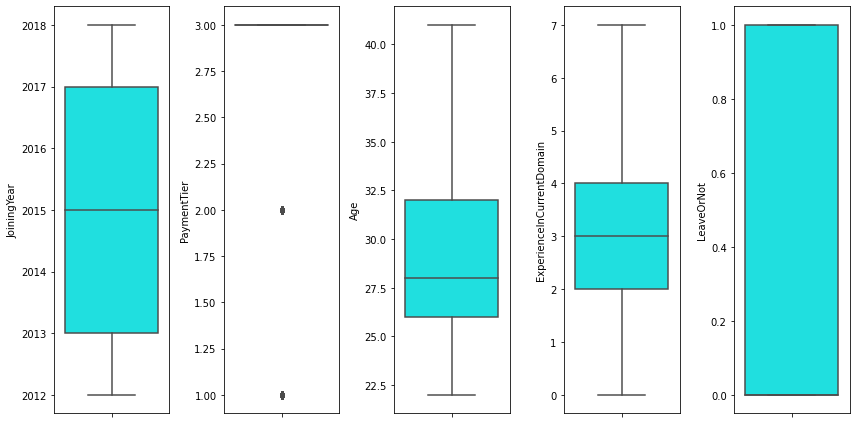

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

## KDE plot for knowing the distribution form

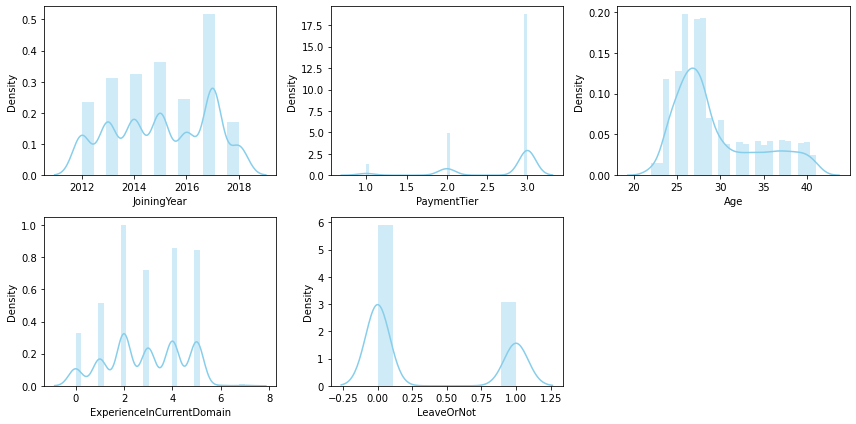

In [ ]:
plt.figure(figsize=(12,6))

features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

#Data Preprocessing

In [ ]:
data =pd.get_dummies(data=df,columns=['Gender','EverBenched','Education','City'],drop_first=True)

data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Male,EverBenched_Yes,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,2017,3,34,0,0,1,0,0,0,0,0
1,2013,1,28,3,1,0,0,0,0,0,1
2,2014,3,38,2,0,0,0,0,0,1,0
3,2016,3,27,5,1,1,0,1,0,0,0
4,2017,3,24,2,1,1,1,1,0,0,1


In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
data['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

##Split Dataset

In [ ]:
X = data.drop(['LeaveOrNot'],axis = 1)
Y = data['LeaveOrNot']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#Modeling

In [ ]:
cly = [LogisticRegression(random_state=42),
      RandomForestClassifier(random_state=42),
      XGBClassifier(random_state=42),
       KNeighborsClassifier(),
       DecisionTreeClassifier(random_state=42),
       GaussianNB()]

df = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC'])
df

,Method,Recall,Precision,F1 Score,AUC


In [ ]:
for model in cly:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    

    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    
    
    df = df.append({'Method': method, 
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc},
                     ignore_index=True)

In [ ]:
df

,Method,Recall,Precision,F1 Score,AUC
0,LogisticRegression,0.451713,0.697115,0.548204,0.674217
1,RandomForestClassifier,0.738318,0.825784,0.779605,0.828175
2,XGBClassifier,0.669782,0.877551,0.759717,0.810301
3,KNeighborsClassifier,0.604361,0.782258,0.681898,0.757918
4,DecisionTreeClassifier,0.728972,0.785235,0.756058,0.812027
5,GaussianNB,0.585670,0.614379,0.599681,0.696114
